# Finding Heavy Traffic Indicators on I-94

## Description of the Project

Interstate I-94 (I-94) is an east-west interstate highway connecting the Great Lakes and northern Great Plains regions in the United States. We're going to analyse westbound traffic on I-94  recorded by a station located approximately midway between Minneapolis and Saint Paul. 

Results, then, are relevant only to westbound traffing around the area of the station. Extrapolations should not be made that suggest trends across the entire interstate.

The dataset to be used for this analysis was made available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) by John Hogue under the [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) license.

## Project Goal

The aim of this project is to determine a few key indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Variable Descriptors

The [Additional Variable Information](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) states the following:
- ```holiday``` - Categorical - US National holidays plus regional holiday, Minnesota State Fair
- ```temp``` - Numeric - Average temp in kelvin
- ```rain_1h``` - Numeric - Amount in mm of rain that occurred in the hour
- ```snow_1h``` - Numeric - Amount in mm of snow that occurred in the hour
- ```clouds_all``` - Numeric - Percentage of cloud cover
- ```weather_main``` - Categorical - Short textual description of the current weather
- ```weather_description``` - Categorical - Longer textual description of the current weather
- ```date_time``` - DateTime - Hour of the data collected in local CST time
- ```traffic_volume``` - Numeric - Hourly I-94 ATR 301 reported westbound traffic volume

## Processing and Analysing

Importing pandas and matplotlib:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the CSV and finding out about the dataset:

In [2]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.info()
print("\n")
print(traffic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13     

We can see the following information:
- There are 9 columns of different attributes.
- There are 48204 rows/entries/observations.
- The columns names use the preferred snakecase for Python.
- There are null values in the ```holiday``` column.
- Columns referring to dates are not in a datetime format.

Looking at the earliest and latest recordings:

In [3]:
print(traffic["date_time"].sort_values(ascending=True))

0        2012-10-02 09:00:00
1        2012-10-02 10:00:00
2        2012-10-02 11:00:00
3        2012-10-02 12:00:00
4        2012-10-02 13:00:00
                ...         
48199    2018-09-30 19:00:00
48200    2018-09-30 20:00:00
48201    2018-09-30 21:00:00
48202    2018-09-30 22:00:00
48203    2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: object


The dataset ranges from 9:00 am on October 2nd, 2012 until 11:00 pm on September 30th, 2018.

In [4]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The average volume of traffic per hour is 3259.

Creating a histogram to visualise the frequency of hourly traffic volume.

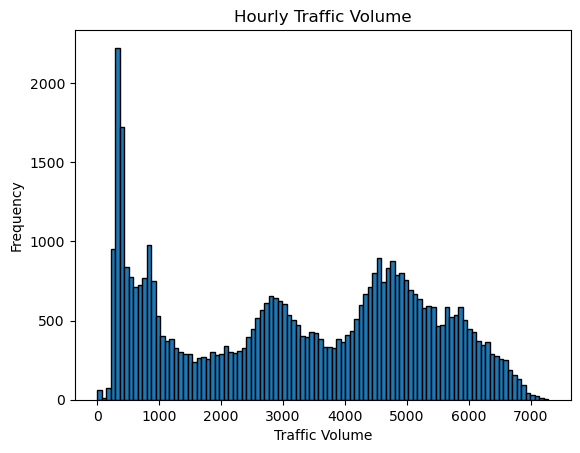

In [5]:
plt.hist(traffic["traffic_volume"], bins=100, ec="black")
plt.title("Hourly Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

Most frequently, the hourly volume is less than 500. However, the hourly volume data is multimodal, with peaks around 2900 and 4700. The first assumption might be that these peaks are based on the time of day.

We will split the data into two parts:
- Daytime data (7:00 am until 7:00 pm)
- Nighttime data (7:00 pm until 7:00 am)

Convering the date_time column to a datetime format:

In [11]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

traffic["date_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: date_time
Non-Null Count  Dtype         
--------------  -----         
48204 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.7 KB


Create a column with a numeric hour:

In [14]:
traffic["hour"] = traffic["date_time"].dt.hour
traffic["hour"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: hour
Non-Null Count  Dtype
--------------  -----
48204 non-null  int32
dtypes: int32(1)
memory usage: 188.4 KB


Creating a "day_or_night" column, and assigning valued based on boolean indexing:

In [74]:
day_hours = [7,8,9,10,11,12,13,14,15,16,17,18]
night_hours = [19,20,21,22,23,0,1,2,3,4,5,6]

traffic.loc[traffic["hour"].isin(day_hours),"day_or_night"] = "day"
traffic.loc[traffic["hour"].isin(night_hours),"day_or_night"] = "night"

Seeing counts of day/night data:

In [76]:
print(traffic["day_or_night"].value_counts())

day_or_night
night    24327
day      23877
Name: count, dtype: int64


Creating histograms of day/night data:

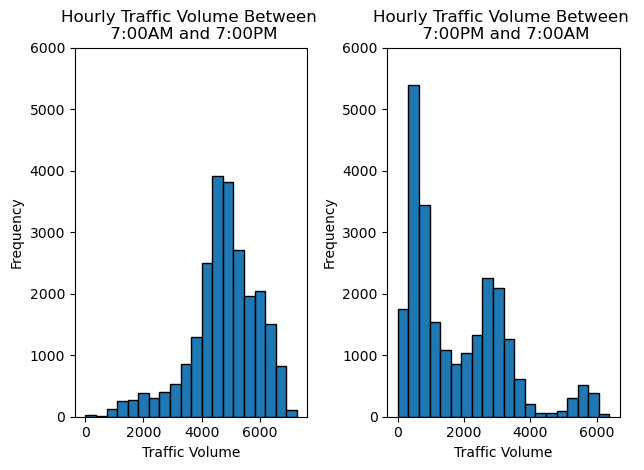

In [114]:
plt.subplot(1,2,1)
plt.hist(traffic.loc[traffic["day_or_night"] == "day","traffic_volume"], bins=20, ec="black")
plt.title("Hourly Traffic Volume Between \n 7:00AM and 7:00PM")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim([0,6000])

plt.subplot(1,2,2)
plt.hist(traffic.loc[traffic["day_or_night"] == "night","traffic_volume"], bins=20, ec="black")
plt.title("Hourly Traffic Volume Between \n 7:00PM and 7:00AM")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim([0,6000])

plt.tight_layout()
plt.show()

Looking at statistics for the day and night datasets:

In [120]:
traffic["traffic_volume"][traffic["day_or_night"] == "day"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [121]:
traffic["traffic_volume"][traffic["day_or_night"] == "night"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

### Cleaning the Column Names

Listing the column names:

In [ ]:
autos.columns

Creating a map and renaming the columns:

In [ ]:
mapping_dict = {
    "dateCrawled":"date_crawled",
    "offerType":"offer_type",
    "vehicleType":"vehicle_type",
    "yearOfRegistration":"registration_year",
    "powerPS":"power_ps",
    "monthOfRegistration":"registration_month",
    "fuelType":"fuel_type",
    "notRepairedDamage":"unrepaired_damage",
    "dateCreated":"ad_created",
    "nrOfPictures":"number_of_pictures",
    "postalCode":"postal_code",
    "lastSeen":"last_seen"}

## renaming the columns using the mapping dictionary to find the original name and replace it with the new name
autos.rename(columns = mapping_dict, inplace=True)
autos.columns

## autos.columns = autos.columns.str.lower() could also be used to just make them all lowercase

Describing the columns:

In [ ]:
autos.describe(include='all')
## include='all' will include columns that are categorical

### Converting Columns to Numeric

The price and odometer columns are object datatypes can be converted to int datatypes to be analysed.

Converting the odometer column:

In [ ]:
## changing the column name
autos.rename({"odometer":"odometer_km"}, axis=1, inplace=True)

## removing string elements from values
autos["odometer_km"] = (autos["odometer_km"]
                            .str.replace(",","")
                            .str.replace("km","")
                            .astype(int)
                       )

Checking values:

In [ ]:
autos.columns
autos["odometer_km"].value_counts()

Converting the price column:

In [ ]:
## removing string elements from values
autos["price"] = (autos["price"]
                            .str.replace(",","")
                            .str.replace("$","")
                            .astype(int)
                       )

Checking values:

In [ ]:
autos["price"].value_counts()

Now that these are datatype int, we should use describe to see the statistics of them:

In [ ]:
autos["price"].describe()

Changing the float_format to not show scientific notation:

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
autos["price"].describe()

Strangely, there is a max price of 99999999 and a min price of 0.

In [ ]:
autos_prices = autos.sort_values("price", ascending=False)
autos_prices.head(20)

The listings with a price from 999990 and up and above will be removed because they do not appear to represent true values of the models. Listings with a value of 0 will also be removed.

In [ ]:
price_bool = autos["price"] < 999990
autos = autos[price_bool]
autos_prices = autos.sort_values("price", ascending=False)
autos_prices.head(10)
autos.shape

These 14 rows have been removed.

In [ ]:
price_bool = autos["price"] > 0
autos = autos[price_bool]
autos_prices = autos.sort_values("price", ascending=True)
autos_prices.head(10)
autos.shape

These 1421 rows have been removed and there are 48565 listings remaining.

### Exploring the Date Columns

The following columns include date/time:
- date_crawled
- registration_year
- registration_month
- ad_created
- last_seen

Exploring the date_crawled column:

In [ ]:
autos["date_crawled"].min()

In [ ]:
autos["date_crawled"].max()

The data appears to have been scraped over a 1-month period from March 5th until April 7th.

Converting the format to datetime:

In [ ]:
autos["date_crawled"] = pd.to_datetime(autos["date_crawled"],format="%Y-%m-%d %H:%M:%S")
autos["date_crawled"]

Creating a column of just the date the ad was scraped:

In [ ]:
autos["date_crawled_date"] = autos["date_crawled"].dt.date.astype("datetime64[ns]")
autos["date_crawled_date"]

Sorting the crawl date chronologically and getting a count of ads scraped per day:

In [ ]:
autos["date_crawled_date"].sort_values(ascending=True).value_counts(sort=False)

There appears to have been consistent scraping until April 5th when fewer ads were scraped.

### Removing Rows with Erroneous Registration Dates

Exploring the registration_year column:

In [ ]:
autos["registration_year"].describe()

Of the remaining ads, there are some irregularities. There are ads listing cars from the years 1000 and 9999. We need to determine how many ads exist with incorrect registration years.

In [ ]:
autos_year_outliers_low = autos[autos["registration_year"] < 1900]
autos_year_outliers_low.shape

These 5 ads with registration dates before 1900 can be removed:

In [ ]:
## replace the autos df with a version of autos that has been filtered by boolean values where TRUE is if the registration_year is above 1900
autos = autos[autos["registration_year"] > 1899]
autos["registration_year"].sort_values(ascending=True).head()

In [ ]:
autos.shape

For years beyond 2016:

In [ ]:
autos_year_outliers_high = autos[autos["registration_year"] > 2016]
autos_year_outliers_high.head()

In [ ]:
autos_year_outliers_high.shape

These 1879 rows can be removed as the registration_year should not be beyond April 2016:

In [ ]:
## replace the autos df with a version of autos that has been filtered by boolean values where TRUE is if the registration_year is before 2017
autos = autos[autos["registration_year"] < 2017]
autos["registration_year"].sort_values(ascending=False).head()

We need to double-check that the 2016 registration_month values for 2016 are not beyond April.

In [ ]:
autos_2016 = autos.loc[(autos["registration_year"] == 2016) & (autos["registration_month"] > 4)]
autos_2016.head(5)

In [ ]:
autos_2016.shape

These 618 rows can also be removed:

In [ ]:
autos_bool = (autos["registration_year"] == 2016) & (autos["registration_month"] > 4)
autos_bool.value_counts()

In [ ]:
autos = autos[~autos_bool]

Double checking that 46063 rows exist (48565 remainig - 5(<1900) - 1879(>2016) - 618(>April 2016))

In [ ]:
autos.shape

All ads listed now only include cars registered from 1900 to 2016 April. However, we can take this one step further. The registration date should always be earlier than the ad listing.

Earlier, we saw that many ads had a registration_month of 0. This likely means that no registration month was included in the ad. These will be updated to 1 so that a new datetime column for registration date works.

In [ ]:
autos["registration_month"].value_counts()

In [ ]:
month_bool = autos["registration_month"] == 0
autos.loc[month_bool,"registration_month"] = 1
autos["registration_month"].value_counts()

Converting registration details to a datetime column:

In [ ]:
## Creating a registration_datetime column that combined the registration year and month.
autos["registration_datetime"] = autos["registration_year"].astype(str) + "-" + autos["registration_month"].astype(str)

## Converting this new column to a datetime format
autos["registration_datetime"] = pd.to_datetime(autos["registration_datetime"], format="%Y-%m")

## Viewing the new column
autos["registration_datetime"].head()

Converting ad_created details to a datetime column:

In [ ]:
autos["ad_created"] = pd.to_datetime(autos["ad_created"], format="%Y-%m-%d %H:%M:%S")

## Viewing the new column
autos["ad_created"]

Detemining how many ads were registered before or on the month they were listed vs. registered after.

In [ ]:
created_bool = autos["registration_datetime"] <= autos["ad_created"]
created_bool.value_counts()

It appears that 64 ads have registration dates after the ad was created.
Viewing examples:

In [ ]:
autos_conflicting_dates = autos[autos["registration_datetime"] > autos["ad_created"]]
autos_conflicting_dates

Removing these rows:

In [ ]:
autos = autos[autos["registration_datetime"] <= autos["ad_created"]]
autos.shape

All ads remaining should now:
- be registered before the ad creation date
- be registered from 1900
- be listed for more than 0 dollars
- be listed for less than 999990 dollars

### Exploring Price by Brand

Creating a list of brands in the dataset:

In [ ]:
list_of_brands = autos["brand"].unique()
list_of_brands

Creating a dictionary of brands and how frequently they have been listed:

In [ ]:
brand_frequencies = {}
for brand in list_of_brands:
    brand_frequencies[brand] = autos[autos["brand"] == brand].shape[0]
    
pd.DataFrame(pd.Series(brand_frequencies),columns=["Frequency"]).sort_values("Frequency",ascending=False).head()

Determining the proportion of ads for each brand:

In [ ]:
brand_proportions = {}

for brand in list_of_brands:
    brand_proportions[brand] = autos[autos["brand"] == brand].shape[0] / autos["brand"].shape[0] * 100

pd.DataFrame(pd.Series(brand_proportions),columns=["Proportion"]).sort_values("Proportion",ascending=False).head()

Volkswagon is the brand of car with the most number of ads, and almost twice that of the second most frequent brand, BMW.

Determining the mean value of cars in ads for each brand:

In [ ]:
total_value_by_brand = {}
average_value_by_brand = {}
for brand in list_of_brands:
    total_value_by_brand[brand] = autos.loc[autos["brand"] == brand,"price"].sum()
    average_value_by_brand[brand] = autos.loc[autos["brand"] == brand,"price"].mean()
   
pd.DataFrame(pd.Series(average_value_by_brand),columns=["Average Price"]).sort_values("Average Price",ascending=False).head()

Ads for Porsche models have a higher value, on average.

### Exploring Mileage by Brand

In [ ]:
total_mileage_by_brand = {}
average_mileage_by_brand = {}

for brand in list_of_brands:
    total_mileage_by_brand[brand] = autos.loc[autos["brand"] == brand,"odometer_km"].sum()
    average_mileage_by_brand[brand] = autos.loc[autos["brand"] == brand,"odometer_km"].mean()
    

pd.DataFrame(pd.Series(total_mileage_by_brand),columns=["Total Mileage"]).sort_values("Total Mileage",ascending=False).head()

In [ ]:
pd.DataFrame(pd.Series(average_mileage_by_brand),columns=["Average Mileage"]).sort_values("Average Mileage",ascending=False).head()

Combining all this information into one dataframe:

In [ ]:
brand_info = pd.DataFrame(list_of_brands, columns=["brand"])

brand_info["frequency"] = brand_info["brand"].map(brand_frequencies)
brand_info["proportion"] = brand_info["brand"].map(brand_proportions)
brand_info["total_value"] = brand_info["brand"].map(total_value_by_brand)
brand_info["average_price"] = brand_info["brand"].map(average_value_by_brand)
brand_info["total_mileage"] = brand_info["brand"].map(total_mileage_by_brand)
brand_info["average_mileage"] = brand_info["brand"].map(average_mileage_by_brand)
brand_info["mileage_per_dollar"] = brand_info["total_mileage"] / brand_info["total_value"]

brand_info.sort_values("mileage_per_dollar", ascending=False)

Daewoo, Rover and Daihatsu all have much higher mileage relative to their cost.

In [ ]:
autos["odometer_km"].mean()

Cars advertised have 123,428 kms on their odometer, on average.

### Determining Which Brands Most Often Have Unrepaired Damage